In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import spacy
import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt

In [28]:
# RQ3: How stable is the community working on the topics (new authors emerging, authors staying on for the whole time,
# or authors “leaving” the area)?

Die Daten werden eingelesen und in der Variable "data" gespeichert

In [29]:
data = pd.read_csv('./data/data.csv')
data.keys()

Die nicht relevanten Spalten werden entfernt und die Spalte in der die Autoren waren (getrennt durch ein Semikolon), werden auf mehrere Spalten aufgeteilt um besser mit dem Dataframe arbeiten zu können. Die Jahre werden zwischengespeichert.

In [31]:
year = data['Publication Year']
data = data['Authors'].str.split(';', expand=True)
data = data.fillna(value=-1)
data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,E. Hill,P. M. Johnson,D. Port,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,T. Dingsøyr,F. O. Bjørnson,F. Shull,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,C. Ebert,M. Kuhrmann,R. Prikladnicki,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,M. Ardis,P. Bourque,T. Hilburn,K. Lasfer,S. Lucero,J. McDonald,A. Pyster,M. Shaw,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,A. Haghighatkhah,M. Oivo,A. Banijamali,P. Kuvaja,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,G. Fairbanks,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2288,L. Hatton,M. van Genuchten,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2289,J. Carver,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2290,G. Robles,I. Steinmacher,P. Adams,C. Treude,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


Die Funktion GetAuthorsandYear wird definiert. Das obige Dataframe wird Spalte für Spalte in ein neues eingefügt, damit die Jahre erhalten bleiben. Im Index stehen nun die Autoren. Zum Schluss wird das neue Dataframe mit der Pivot-Funktion bearbeitet und dieses Dataframe wird zurückgegeben. 

In [79]:
def GetAuthorsandYear(data):
    b = None
    for column in data:
        r = data[column].to_frame().join(year)
        r.rename(columns={ r.columns[0]: "Author" }, inplace = True)
        if b is None:
            b = r
        else:
            b = pd.concat([b, r])
    b.reset_index(drop = True)
    b = b[b.Author != -1]
    b['Count'] = 1
    b = b.rename({ 'Publication Year': 'Year'}, axis=1)
    result = b.pivot_table(index='Author', 
                        columns='Year', 
                        values='Count',
                        aggfunc=np.sum,
                        fill_value = 0)
    return result

Die Funktion wird ausgeführt und eine neue Spalte "summe" wird eingefügt. In dieser Spalte steht die Anzahl der gesamten Publikationen der Autoren.

In [97]:
data = GetAuthorsandYear(data)
data['summe'] = data.sum(axis=1)
data.sort_values(by=["summe"], ascending=False)

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,summe
Author,,,,,,,,,,,,,,
A. E. Hassan,1,0,0,0,2,2,3,6,4,2,8,12,8,48
D. Spinellis,2,2,0,0,1,4,6,5,6,6,1,0,0,33
D. Lo,0,0,0,0,0,0,0,1,1,1,11,10,6,30
T. Menzies,0,0,1,2,2,0,1,0,0,5,6,7,4,28
F. Shull,0,1,7,6,6,6,0,1,1,0,0,0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M. Aguirre-Urreta,0,0,0,0,0,0,0,1,0,0,0,0,0,1
M. Ali Babar,0,0,0,0,1,0,0,0,0,0,0,0,0,1
M. Aniche,0,0,0,0,0,0,0,0,0,0,0,1,0,1


SortbyYear sortiert die Autoren nach den Publikationen in einem ausgewähltem Jahr (mit einem Minimumwert).

In [98]:
def SortbyYear(data,jahr,publications):    
     for item in data:   
            p = data.loc[data[jahr] >= publications]
            return p.sort_values(by=[jahr], ascending=False)
#Beispiel
SortbyYear(data,2019,3)

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,summe
Author,,,,,,,,,,,,,,
D. Lo,0,0,0,0,0,0,0,1,1,1,11,10,6,30
X. Xia,0,0,0,0,0,0,0,0,0,0,10,11,4,25
A. E. Hassan,1,0,0,0,2,2,3,6,4,2,8,12,8,48
T. Menzies,0,0,1,2,2,0,1,0,0,5,6,7,4,28
I. Ozkaya,0,0,0,0,0,0,0,0,0,0,6,3,2,11
G. Fairbanks,0,0,0,0,0,1,0,0,0,0,6,1,0,8
L. Zhang,0,0,0,2,1,1,0,1,0,0,6,6,2,19
M. Harman,0,0,2,1,1,0,2,0,4,2,6,3,5,26
Y. Zhang,0,0,0,0,0,0,0,1,2,0,5,2,2,12


Diese Funktion zeigt die Top-5-Autoren, die in einem ausgewähltem Jahr die meisten Publikationen haben.

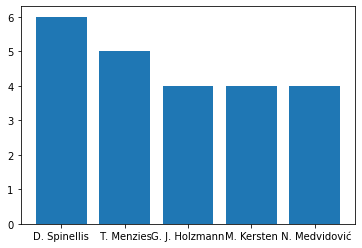

In [99]:
def ShowBestOfYear(data,jahr):
    x = data
    x = x.sort_values(by=[jahr], ascending=False).head(5)
    plt.bar(x.index,x[jahr])
#Beispiel
ShowBestOfYear(data,2018)

Um die Newcomer zu bestimmen wird eine neue Spalte "summe_" eingeführt. Diese zählt die Publikationen der letzten 4 Jahre zusammen und überprüft ob die Anzahl dieser Summe mehr als 80% der Spalte "summe" ist, die anderen Zeilen werden entfernt. 

In [100]:
def ShowNewComer(data):
    result = data
    result['summe_'] =  result[2018] + result[2019] + result[2020] + result[2021]
    result = result[result.summe_ >= 4]
    result = result[result.summe_ >= 0.8 * result.summe]
    result = result.sort_values(by=['summe_'], ascending=False)
    return result
#Beispiel
result = ShowNewComer(data)
ShowNewComer(data)

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,summe,summe_
Author,,,,,,,,,,,,,,,
D. Lo,0,0,0,0,0,0,0,1,1,1,11,10,6,30,28
X. Xia,0,0,0,0,0,0,0,0,0,0,10,11,4,25,25
S. Wang,0,0,0,0,0,0,1,0,0,1,5,3,6,16,15
J. Grundy,0,0,1,0,1,0,0,0,1,2,0,6,6,17,14
I. Ozkaya,0,0,0,0,0,0,0,0,0,0,6,3,2,11,11
A. Serebrenik,0,0,0,0,0,0,0,0,2,3,3,2,2,12,10
T. Chen,0,0,0,0,0,0,0,1,0,0,1,7,2,11,10
Z. Xing,0,0,0,0,0,0,0,0,0,1,4,1,3,9,9
X. Luo,0,0,0,0,0,0,0,0,0,1,1,2,5,9,9


Da es zwischen den Newcomern noch einige Autoren gibt, die zwischendurch aktiv waren müssen diese mit der folgenden Funktion gefiltert werden. Als Ergebnis erhalten wir die Newcomer.

In [102]:
def FilterNewComer(data):
    p = data
    for year in range(2009,2017,1):
        p = p[p[year] == 0]
    return p
#Beispiel
FilterNewComer(result)

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,summe,summe_
Author,,,,,,,,,,,,,,,
X. Xia,0,0,0,0,0,0,0,0,0,0,10,11,4,25,25
I. Ozkaya,0,0,0,0,0,0,0,0,0,0,6,3,2,11,11
A. Serebrenik,0,0,0,0,0,0,0,0,2,3,3,2,2,12,10
Z. Xing,0,0,0,0,0,0,0,0,0,1,4,1,3,9,9
X. Luo,0,0,0,0,0,0,0,0,0,1,1,2,5,9,9
S. Li,0,0,0,0,0,0,0,0,0,1,2,1,3,7,7
S. Apel,0,0,0,0,0,0,0,0,0,1,0,3,2,6,6
A. Panichella,0,0,0,0,0,0,0,0,0,1,3,2,0,6,6
F. Sarro,0,0,0,0,0,0,0,0,1,0,1,1,4,7,6


Um die bestehenden Autoren in der Szene zu sehen wird die Funktion von den Newcomern einfach umgeschrieben. Als Ergebnis erhalten wir Autoren, die mindestens 50% ihrer Arbeiten vor den letzten 4 Jahren publiziert haben.

In [106]:
def ShowStaying(data):    
    result = data
    result['summe_'] =  result[2018] + result[2019] + result[2020] + result[2021]
    result.sort_values(by=['summe_'], ascending=False)
    result = result[result.summe_ >= 4]
    result = result[result.summe_ <= 0.5 * result.summe]
    result = result.sort_values(by=['summe_'], ascending=False)
    return result
#Beispiel
ShowStaying(data)

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,summe,summe_
Author,,,,,,,,,,,,,,,
B. Adams,0,0,0,0,1,2,1,4,1,1,1,4,2,17,8
R. Oliveto,0,0,1,0,0,2,3,0,2,2,3,0,3,16,8
J. C. Carver,0,0,0,0,0,0,2,3,6,3,2,1,2,19,8
T. Gorschek,0,1,0,2,0,1,0,2,1,3,1,2,1,14,7
D. Spinellis,2,2,0,0,1,4,6,5,6,6,1,0,0,33,7
B. Penzenstadler,0,0,0,0,0,0,1,3,2,2,0,1,2,11,5
L. Briand,0,0,0,3,0,0,1,0,1,1,1,2,1,10,5
T. Xie,0,0,0,1,2,0,1,2,1,1,0,3,1,12,5
G. J. Holzmann,0,0,1,0,0,1,6,5,5,4,0,1,0,23,5


Die folgende Funktionen zeigt die inaktiven Autoren, die seit 2015 nicht mehr publiziert haben.

In [109]:
def LeavingAuthors(data,start):
    p = data
    for year in range(start,2022,1):
        p = p[p[year] == 0]
    return p
#Beispiel
LeavingAuthors(res,2016)

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,summe,summe_
Author,,,,,,,,,,,,,,,
A. Ahmad,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
A. Appari,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
A. Aurum,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
A. B. Sandberg,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
A. B. Tran,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y. Shin,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
Y. Tsuchitoi,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
Y. Xiong,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [121]:
x =  data.drop( 2020 ,axis = 1)

In [128]:
data.columns[-5:]


Index([2019, 2020, 2021, 'summe', 'summe_'], dtype='object', name='Year')

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,summe,summe_
Author,,,,,,,,,,,,,,,
A. A. Abbasi,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
A. A. Tsintzira,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
A. Abdin,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
A. Agah,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
A. Agrawal,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z. Tian,0,0,0,0,0,0,1,0,0,1,0,0,0,2,1
Z. Wan,0,0,0,0,0,0,0,0,0,0,2,1,0,3,3
Z. Wang,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
